In [1]:
from train import conf
import glob
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
animal = 'ST260'
day_name = 'Day1'
exp_pref = f'{animal}_{day_name}'
path_models = f"{conf.path2outputs}/{exp_pref}"

In [3]:
list_files = glob.glob(f"{path_models}/models_*.pkl")

In [4]:
with open(f"{path_models}/models_layer0.pkl","rb") as f:
    results = pkl.load(f)
WAICs = np.zeros((len(results)+1,len(results)+1))
WAICs[0,1:] = [a[3] for a in results]
for layer in range(1,len(results)):
    with open(f"{path_models}/models_layer{layer}.pkl","rb") as f:
        res = pkl.load(f)
    WAICs[layer,(layer+1):] = [a[3] for a in res]

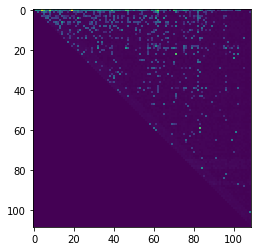

In [5]:
plt.imshow(WAICs[:])

In [8]:
def transform(X,Y,model_list):
    S = torch.tensor(X).float().squeeze().to(device)
    next_layer = []
    for n in range(1,Y.shape[-1]):
        # load model
        likelihoods = model_list[n-1]
        if (len(likelihoods[0])==1) and (likelihoods[1]=='Independence'):
            next_layer.append(Y[:,n])
        else:
            weights_file = f"{path_models}/layer{layer}/model_{exp_pref}_0-{n}.pth"
            model = utils.get_model(weights_file, likelihoods[0], device) 
            # load data
            samples = torch.tensor(Y[:,[n,0]]).float().squeeze().to(device) # order!

            with torch.no_grad():
                f_samples = model(S).rsample(torch.Size([10]))
            f_samples.shape

            copula = model.likelihood.get_copula(f_samples.mean(dim=0))

            next_layer.append(copula.ccdf(samples).cpu().numpy())
    return X,next_layer
results[0][0]

[GumbelCopula_Likelihood(
   (quadrature): GaussHermiteQuadrature1D()
 ), GumbelCopula_Likelihood(
   (quadrature): GaussHermiteQuadrature1D()
 )]